In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pymc as pm
import pymc.sampling_jax
import arviz as az
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-viridish")

In [3]:
n1 = 155
y1 = 108
n2 = 57
y2 = 28

In [4]:
with pm.Model() as model:
    # Define the priors for the two proportions
    p1 = pm.Beta("p1", alpha=2, beta=2)
    p2 = pm.Beta("p2", alpha=2, beta=2)

    # Define the likelihood functions for the two proportions
    likelihood1 = pm.Binomial("likelihood1", n=n1, p=p1, observed=y1)
    likelihood2 = pm.Binomial("likelihood2", n=n2, p=p2, observed=y2)

    # Define the difference of odds model
    odds_ratio = pm.Deterministic("odds_ratio", (p1 / (1 - p1)) / (p2 / (1 - p2)))

In [5]:
with model:
    trace = pm.sampling_jax.sample_numpyro_nuts(draws=2000, tune=1000)

Compiling...


Compilation time =  0:00:01.857852
Sampling...


  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Sampling time =  0:00:01.618060
Transforming variables...
Transformation time =  0:00:00.054110


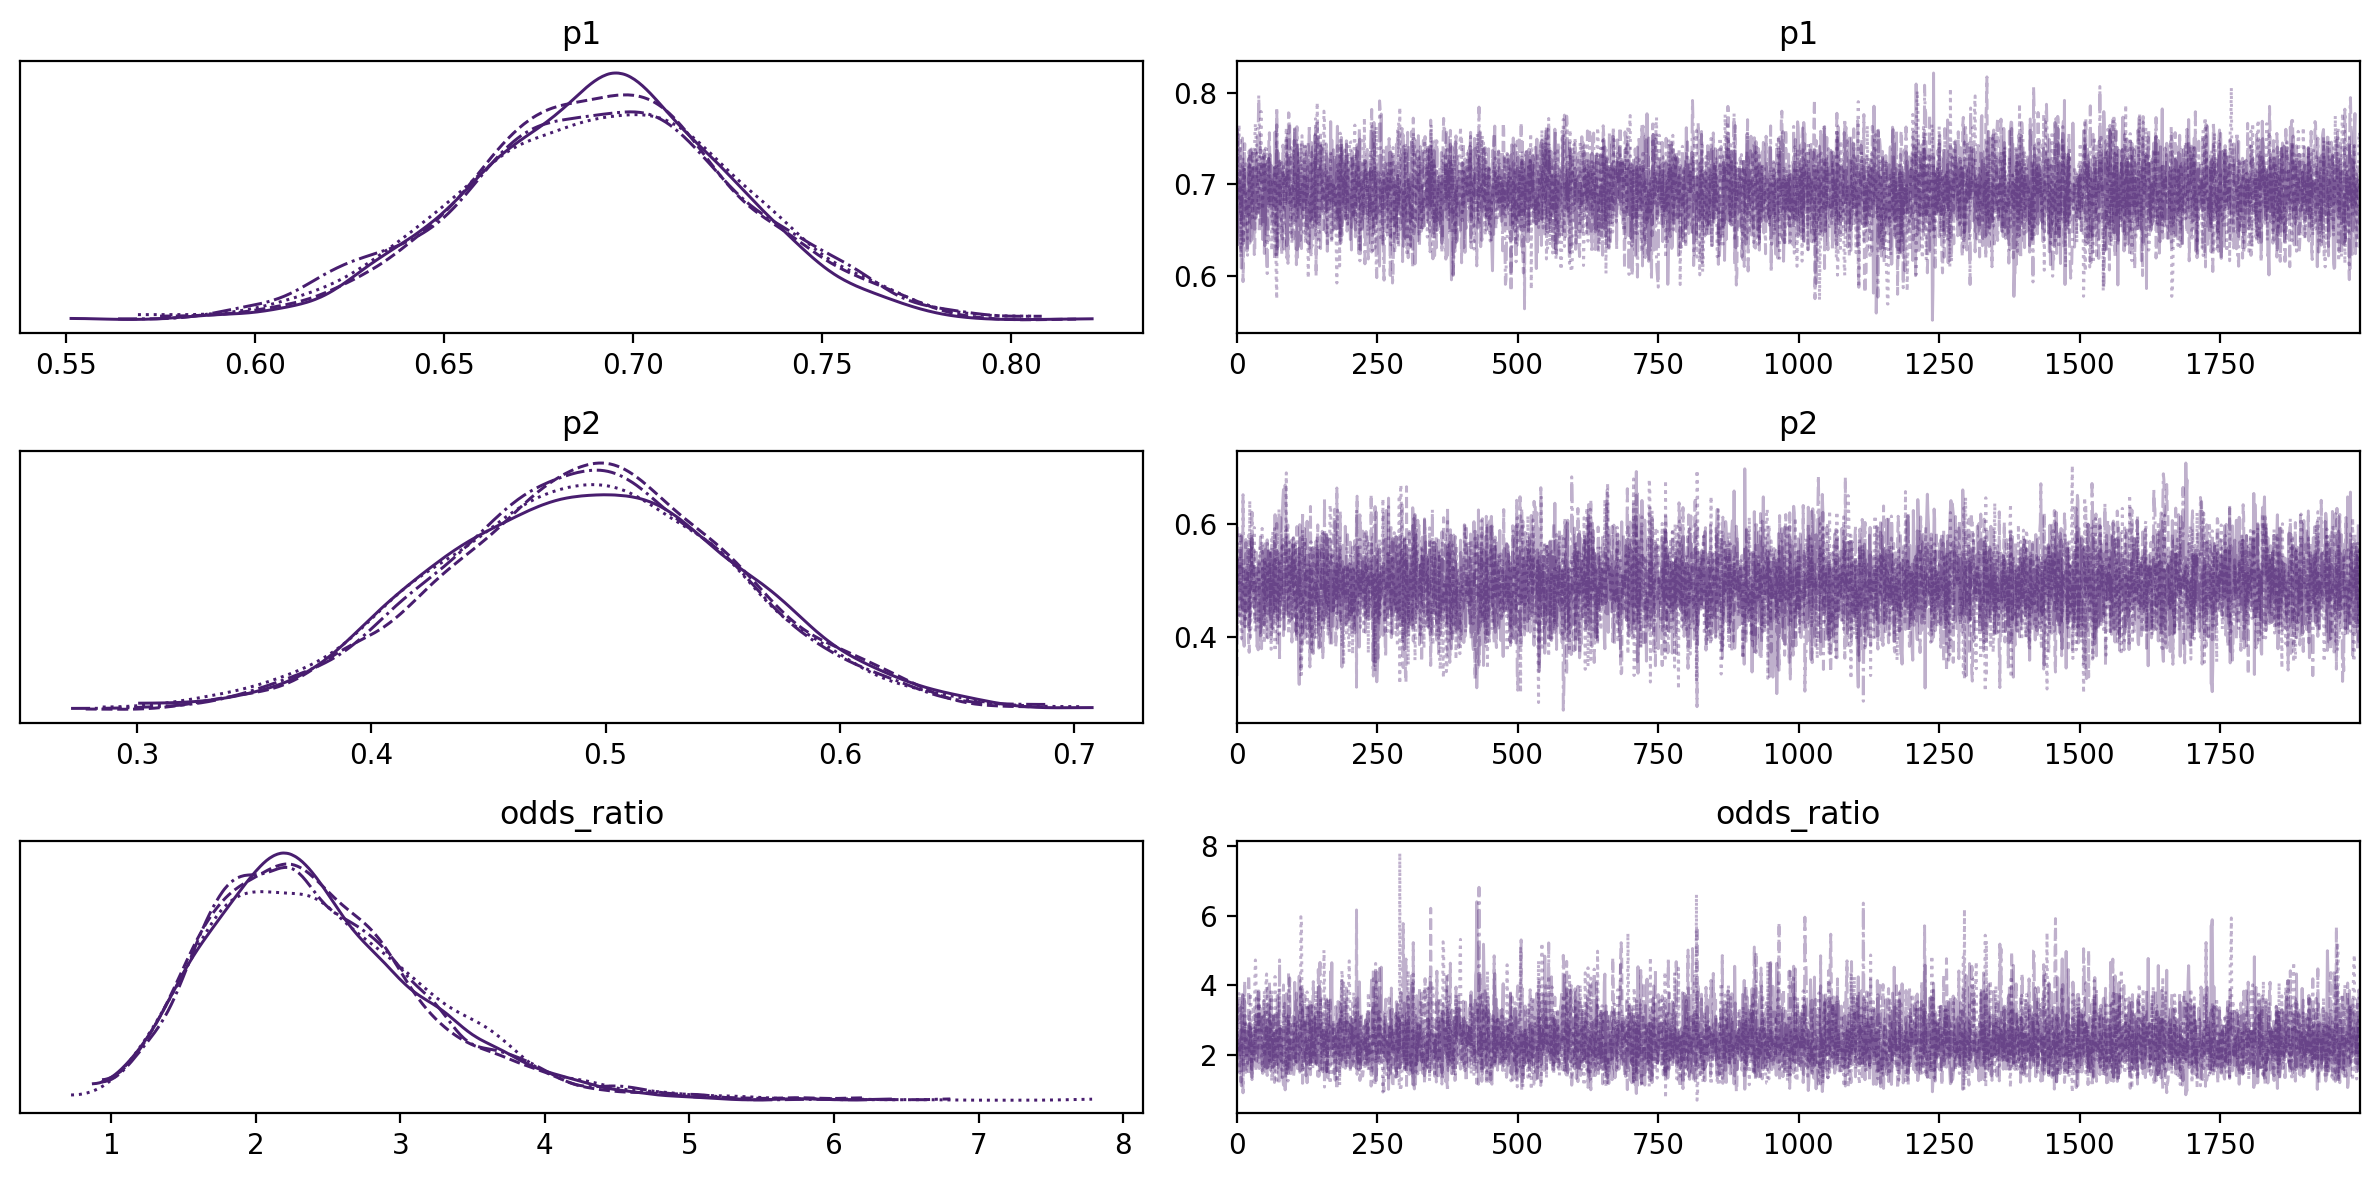

In [6]:
az.plot_trace(trace)
plt.tight_layout()

In [7]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p1,0.691,0.036,0.625,0.762,0.000,0.000,6540.0,5292.0,1.0
p2,0.493,0.063,0.375,0.614,0.001,0.001,6116.0,4870.0,1.0
odds_ratio,2.436,0.767,1.141,3.818,0.010,0.007,6094.0,4919.0,1.0


In [8]:
az.rhat(trace)

<xarray.Dataset>
Dimensions:     ()
Data variables:
    p1          float64 1.003
    p2          float64 1.001
    odds_ratio  float64 1.001

In [9]:
az.mcse(trace)

<xarray.Dataset>
Dimensions:     ()
Data variables:
    p1          float64 0.0004498
    p2          float64 0.0008079
    odds_ratio  float64 0.009784

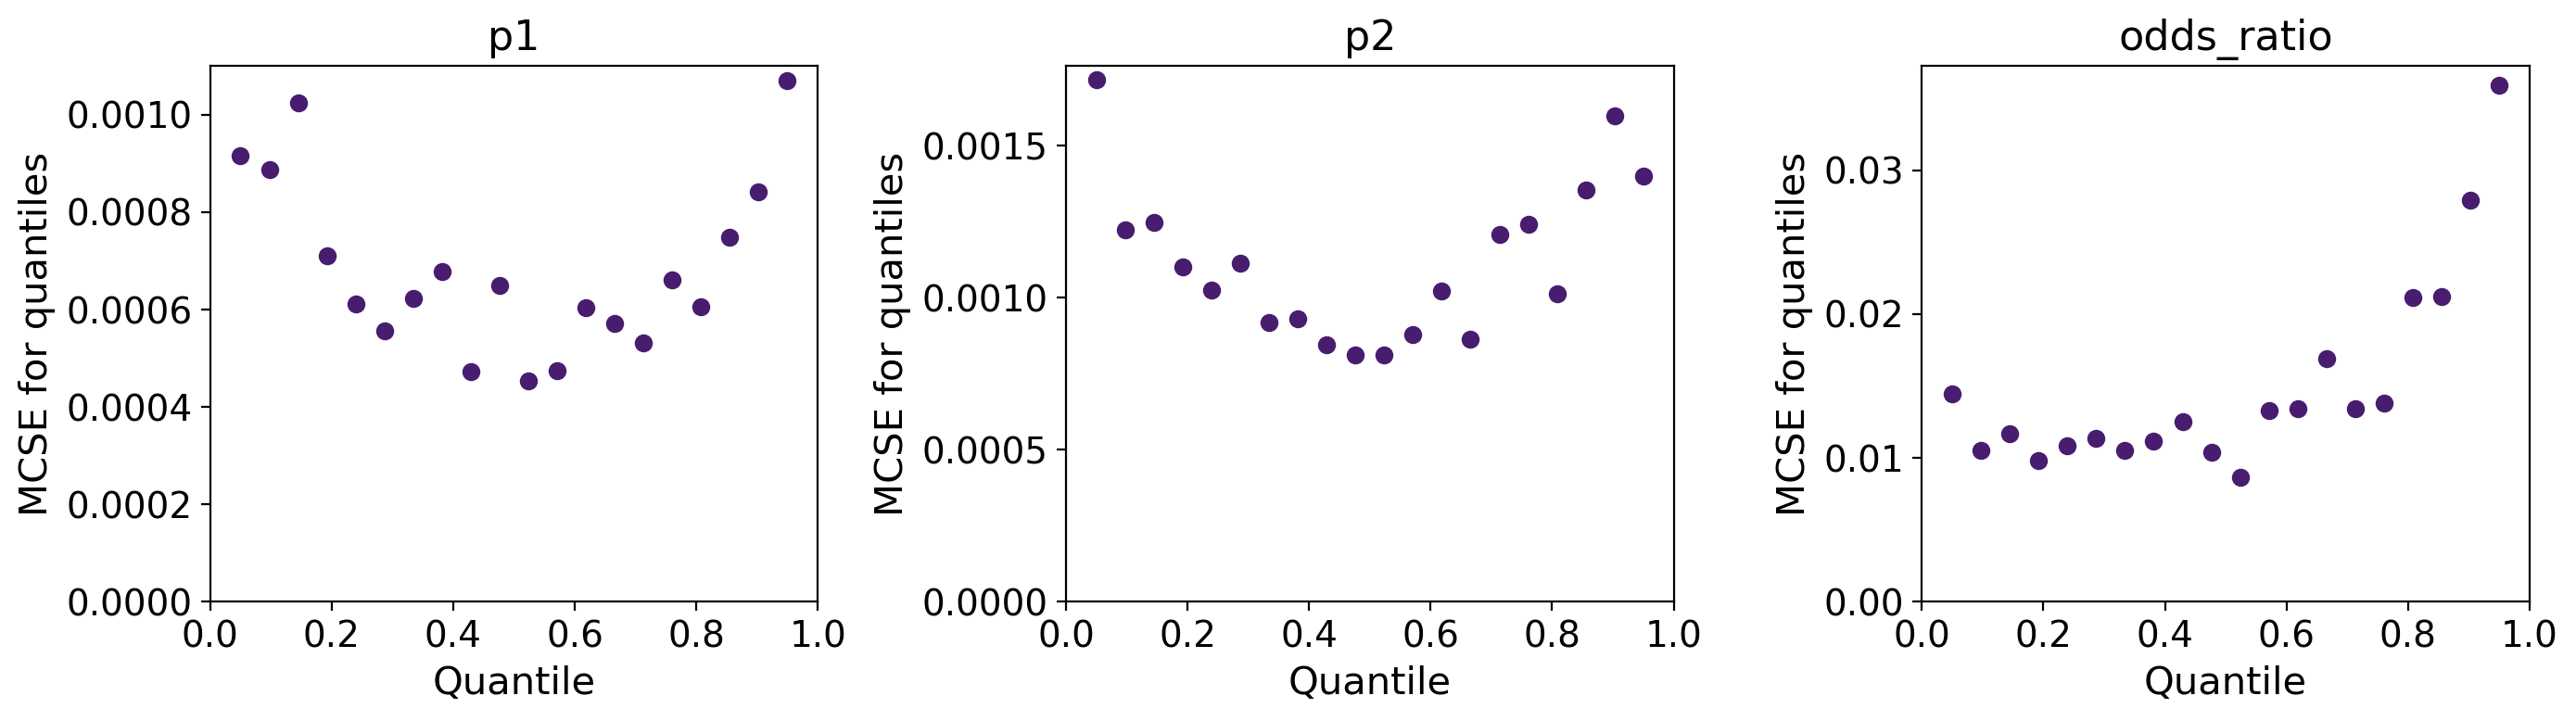

In [10]:
az.plot_mcse(trace, figsize=(14, 4))
plt.tight_layout()

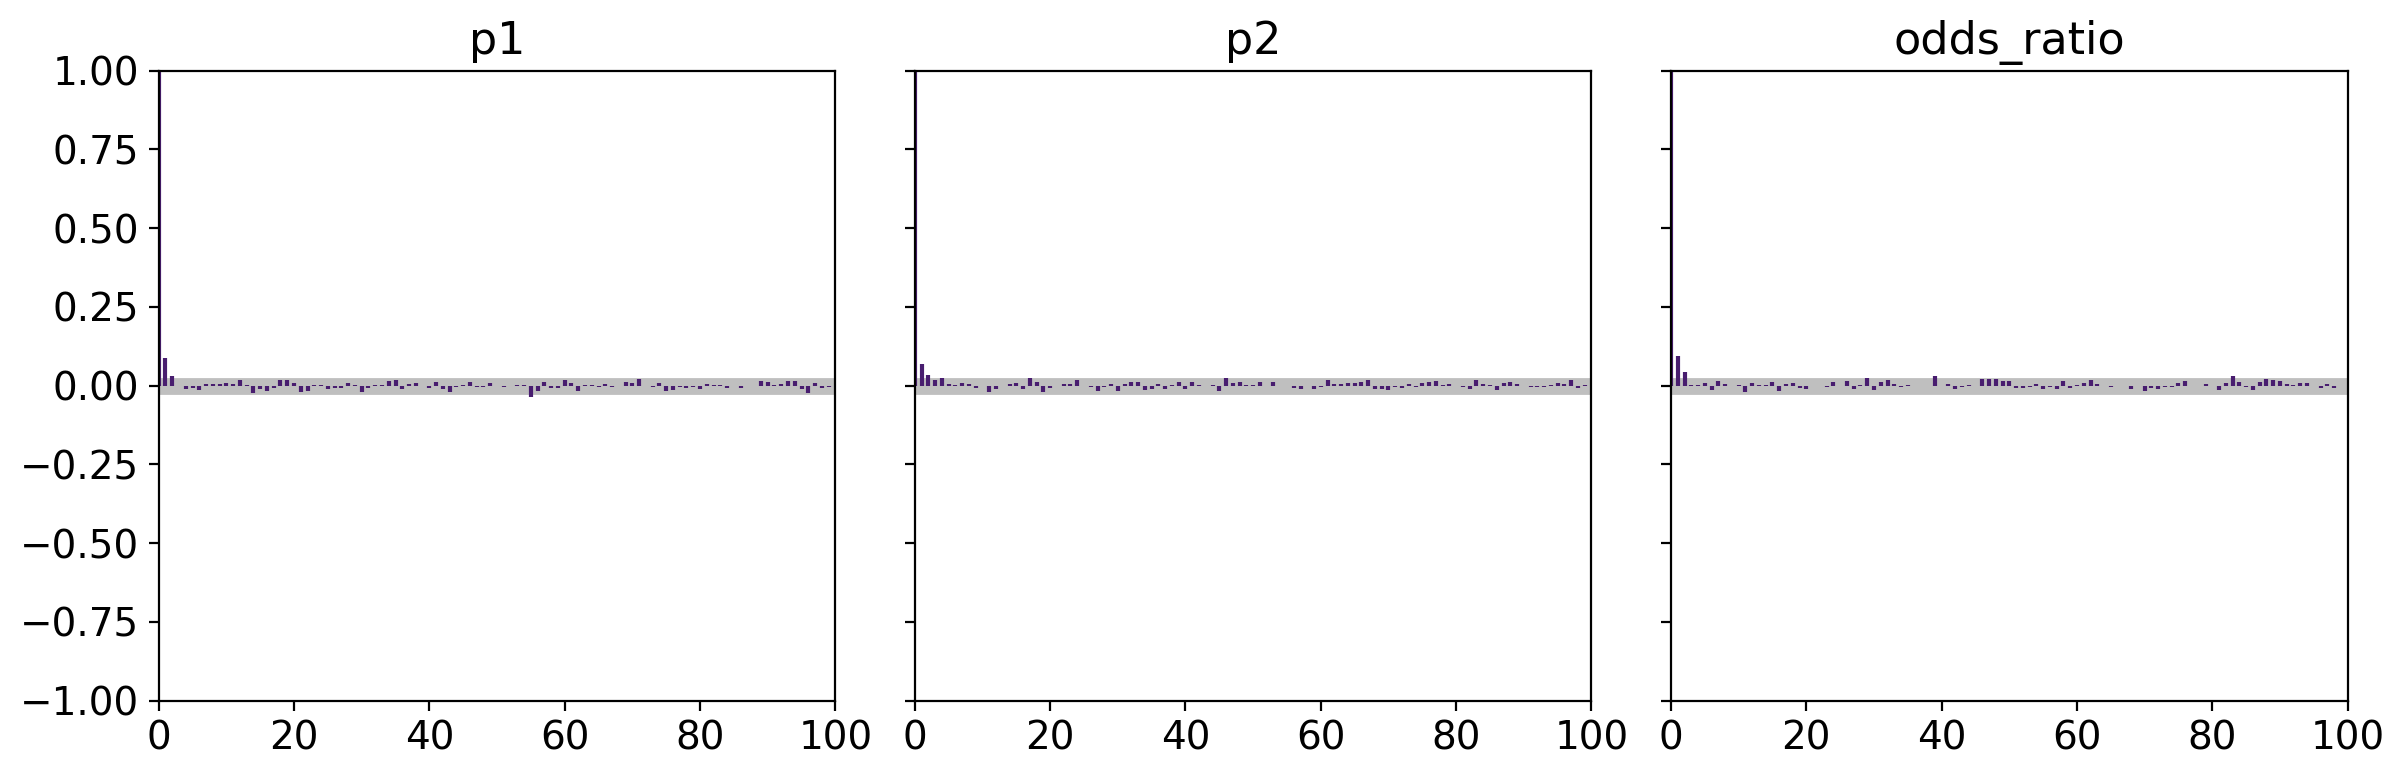

In [11]:
az.plot_autocorr(trace, combined=True, figsize=(12, 4))
plt.tight_layout()
plt.show()

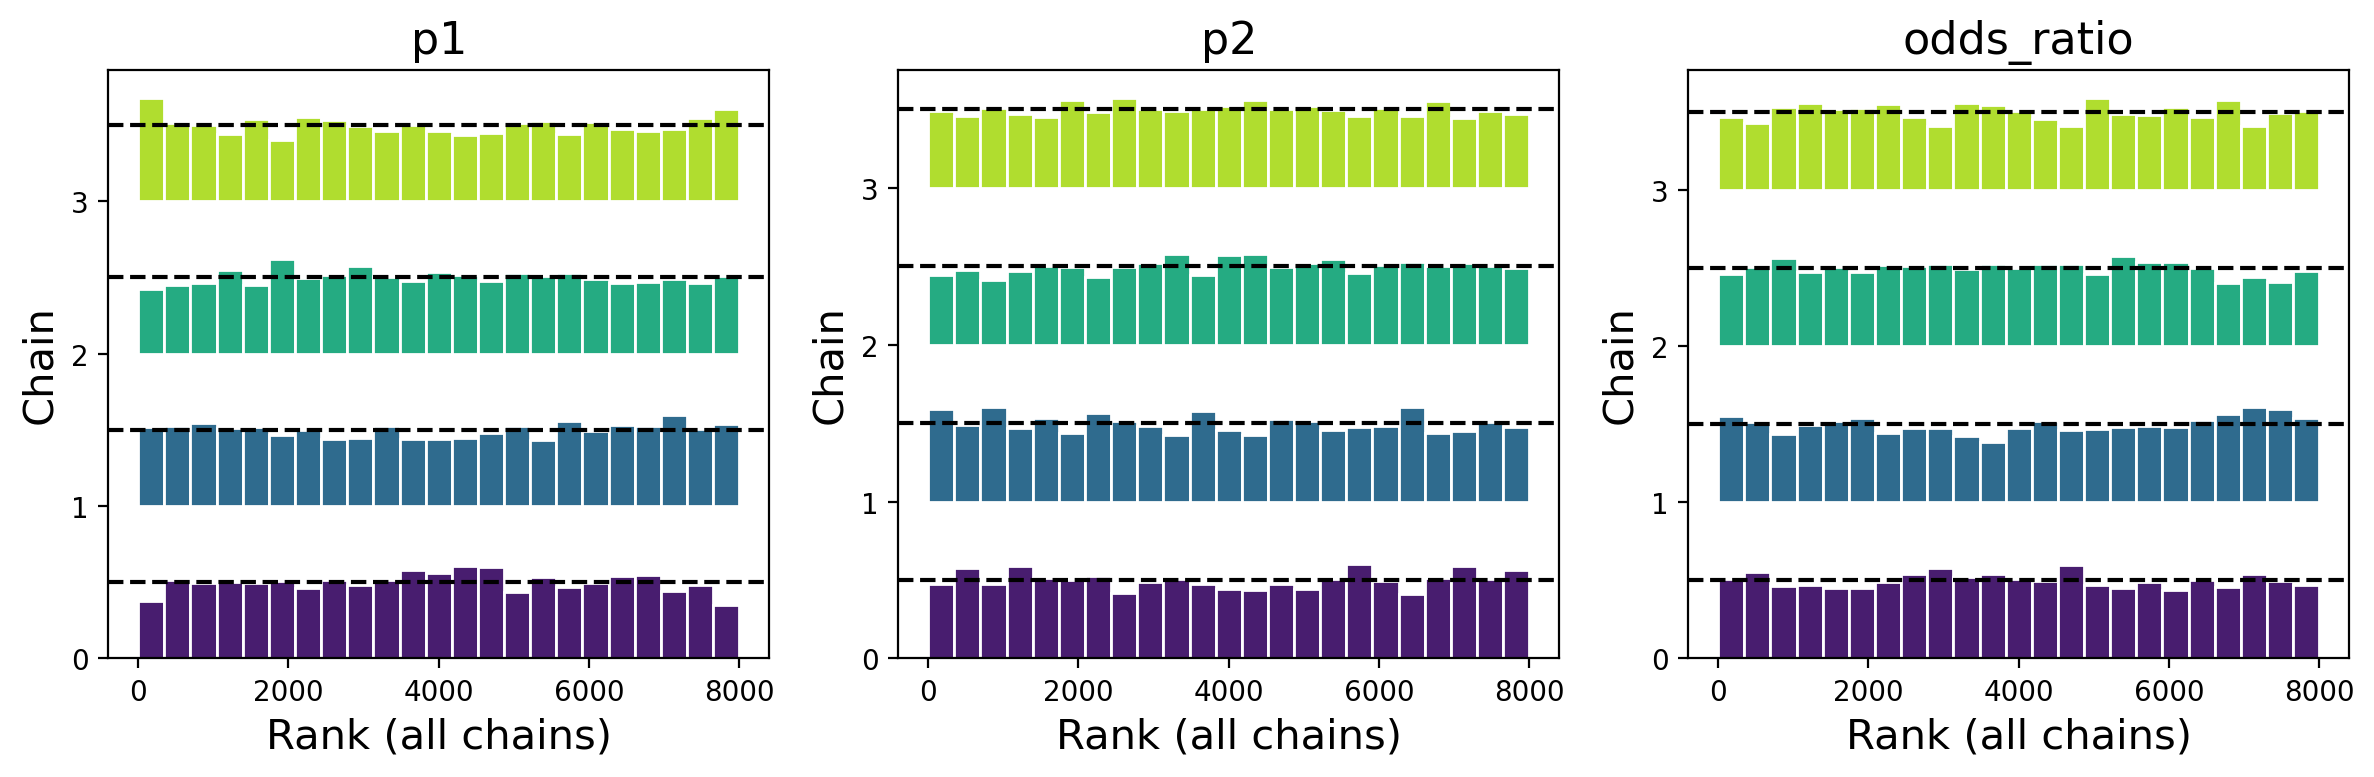

In [12]:
az.plot_rank(trace, kind="bars", figsize=(12, 4))
plt.tight_layout()

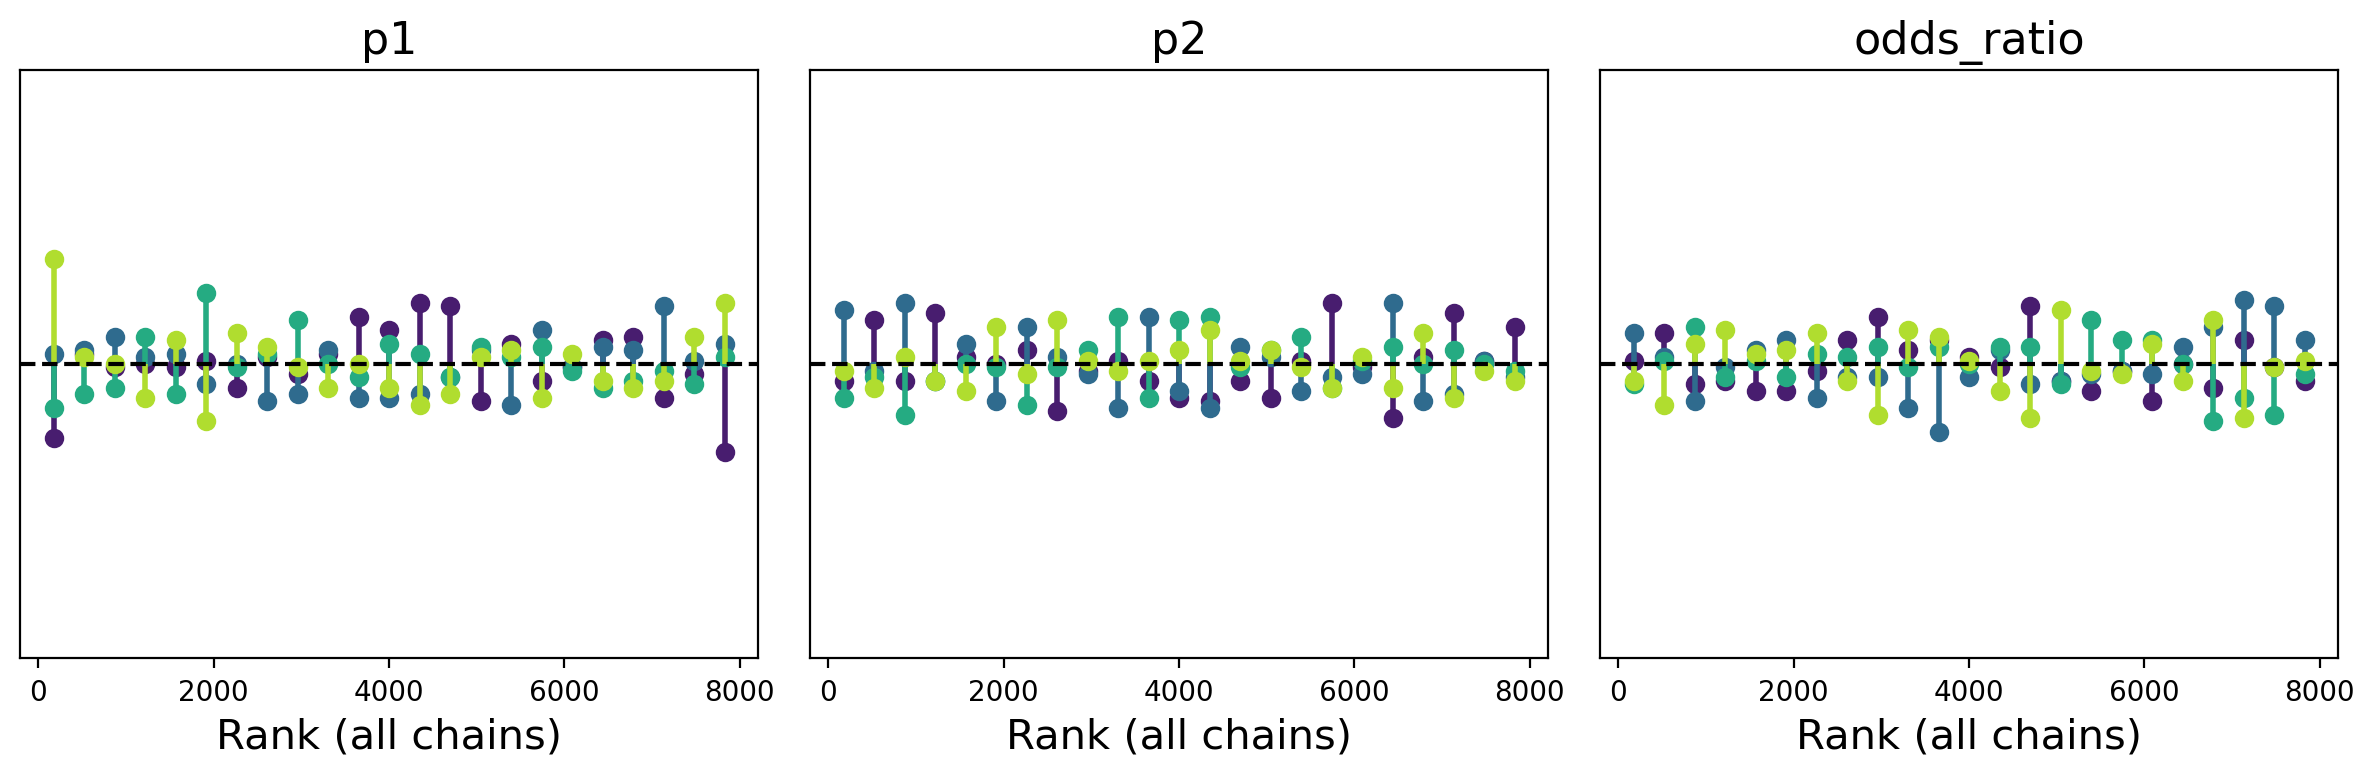

In [13]:
az.plot_rank(trace, kind="vlines", figsize=(12, 4))
plt.tight_layout()
plt.show()

In [14]:
az.bfmi(trace)

array([1.14480557, 1.15894096, 1.16141651, 1.19209174])

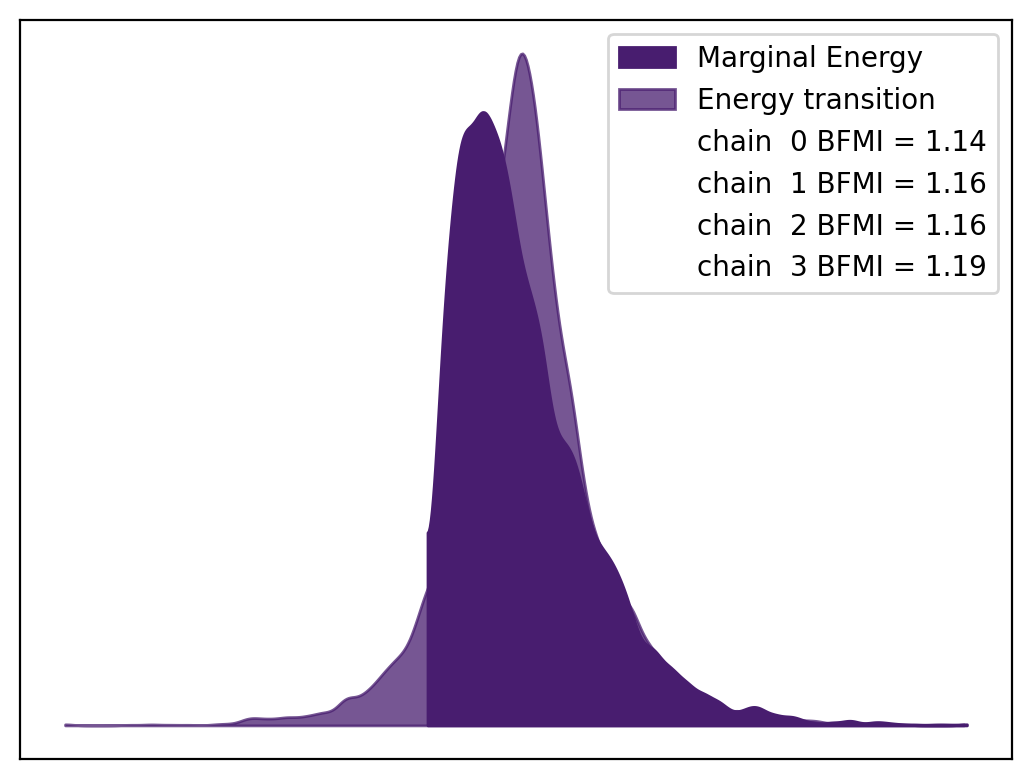

In [15]:
_ = az.plot_energy(trace)

In [16]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Sun Sep 17 2023

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

arviz     : 0.16.0
seaborn   : 0.12.2
numpy     : 1.25.2
pandas    : 2.0.3
pymc      : 5.6.1
matplotlib: 3.7.2

Watermark: 2.4.3

